In [1]:
import tensorflow as tf
import pandas as pd
from keras.models import load_model
import numpy as np
from matplotlib import pyplot as plt
import random
import sys


### Load Dataset

In [2]:
# Could use TF loaders to load data
def load_dataset(path_train = 'Arrow R&D ML Engineer/train.csv', path_test = 'Arrow R&D ML Engineer/test.csv'):
    '''
        Loads data as pandas' dataframe
    '''
    assert isinstance(path_train,str), 'Train file path must be a string'
    assert isinstance(path_test,str), 'Test file path must be a string'
    try:
        train = pd.read_csv(path_train)
        test = pd.read_csv(path_test)
        return train.iloc[:,:-1], train.iloc[:,-1],test.iloc[:,:-1], test.iloc[:,-1]
    except OSError as e:
        print('Please provide the correct path.',e)

In [3]:
dataset = load_dataset()
X_train, y_train, X_test, y_test = dataset[0],dataset[1],dataset[2],dataset[3]

### Define Neural Network

In [4]:
class NeuralNetwork():
    '''
        Class to define an artificial neural network. The class expects number of neurons
        in each layer and the number of output neurons. 
        
    '''
    def __init__(self, list_of_neurons_in_layer, last_layer_neurons=10, activation_function='relu',dropout_rate = 0, regularizer = 0.01):
        '''
            Initialize the neural network. 
        '''
        assert isinstance(list_of_neurons_in_layer,list), 'list_of_neurons_in_layer must be of type list.'
        assert isinstance(last_layer_neurons, int), 'last_layer_neurons must be of type integer.'
        assert isinstance(activation_function, str), 'activation_function must be of type string.'
        assert isinstance(dropout_rate, float), 'dropout_rate must be of type float.'
        
        #Build model based on the provided list
        self.model = tf.keras.models.Sequential()
        for i, neurons in enumerate(list_of_neurons_in_layer):
            if i == 0:
                self.model.add(tf.keras.layers.Dense(neurons, activation = activation_function,))
            else:
                self.model.add(tf.keras.layers.Dense(neurons, activation = activation_function,
                                                    kernel_regularizer = tf.keras.regularizers.l2(regularizer)))
                self.model.add(tf.keras.layers.Dropout(dropout_rate))
        self.model.add(tf.keras.layers.Dense(last_layer_neurons, activation='softmax'))
        
    def compile(self, optimizer, loss, metrics):
        '''
            Compile the built model. 
            
        '''
#         assert isinstance(optimizer, str), 'Optimizer must be of type string'
#         assert isinstance(loss, str), 'Optimizer must be of type string'
#         assert isinstance(metrics, list), 'Optimizer must be of type list'
        
        self.model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

    def fit(self, x_train, y_train, epochs = 30, batch_size = 32, validation_split = 0.2, verbose = 1):
        '''
            Fit the training data to the model. 
        '''
        assert isinstance(epochs, int), 'Epochs must be of type integer'
        assert isinstance(batch_size, int), 'Batch Size must be of type integer'
        assert isinstance(validation_split, float), 'Validation Split must be of type float'
        # Model checkpoints
        self.model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, 
                       validation_split = validation_split, verbose = verbose)
    
    def evaluate(self, x_test, y_test):
        '''
            Evaluate the model
        '''
        return self.model.evaluate(x_test, y_test)
    
    def plot_loss(self):
        '''
            Plot the accuracy and loss of the model.
        :return:
        '''        
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.suptitle('Model performance')
        ax1.plot(self.model.history.history['accuracy'])  
        ax1.plot(self.model.history.history['val_accuracy'])  
        ax2.plot(self.model.history.history['loss'])  
        ax2.plot(self.model.history.history['val_loss'])  
        ax1.set_title('model accuracy')
        ax1.set_ylabel('accuracy')
        ax1.set_xlabel('epoch')
        ax1.legend(['train','val'], loc='lower right')
        ax2.set_title('model loss')
        ax2.set_ylabel('loss')
        ax2.set_xlabel('epoch')
        ax2.legend(['train','val'], loc='upper right')

    def predict(self, x_test):
        '''
            Predict the output of the model
        '''
        return self.model.predict(x_test)

In [5]:
NN= NeuralNetwork([100,50],10,dropout_rate=0.4, regularizer=0.05)

Metal device set to: Apple M1 Pro


2022-05-05 10:38:57.443272: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-05 10:38:57.443379: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [20]:
NN.compile('adagrad','sparse_categorical_crossentropy',['accuracy'])

In [21]:
NN.fit(X_train,y_train,epochs=5)

Epoch 1/5
 22/750 [..............................] - ETA: 3s - loss: 5.6388 - accuracy: 0.1293

2022-05-05 09:53:28.810044: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


742/750 [============================>.] - ETA: 0s - loss: 4.9499 - accuracy: 0.1669

2022-05-05 09:53:32.422043: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


750/750 [==============================] - 4s 6ms/step - loss: 4.9449 - accuracy: 0.1671 - val_loss: 4.4221 - val_accuracy: 0.2460
Epoch 2/5
750/750 [==============================] - 4s 5ms/step - loss: 4.1304 - accuracy: 0.2484 - val_loss: 3.8173 - val_accuracy: 0.3348
Epoch 3/5
750/750 [==============================] - 4s 5ms/step - loss: 3.6537 - accuracy: 0.2892 - val_loss: 3.4170 - val_accuracy: 0.3890
Epoch 4/5
750/750 [==============================] - 4s 5ms/step - loss: 3.3158 - accuracy: 0.3217 - val_loss: 3.1246 - val_accuracy: 0.4153
Epoch 5/5
750/750 [==============================] - 4s 5ms/step - loss: 3.0658 - accuracy: 0.3469 - val_loss: 2.9018 - val_accuracy: 0.4393


In [22]:
# NN.predict(X_test.iloc[1:2,:])

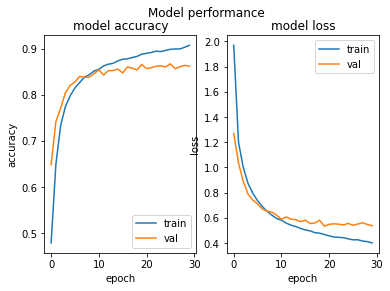

In [101]:
NN.plot_loss()

In [104]:
NN.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9410 - accuracy: 0.7581


[0.9409602880477905, 0.7581000328063965]

In [44]:
class ensemble():
    '''
            Ensemble class to create an ensemble of models.
    '''
    def __init__(self):
        self.models = []

        
    def build_model(self, no_of_models):
        '''
            Build a model for each of the models in the ensemble.
        '''
        assert isinstance(no_of_models, int), 'No of models must be of type integer'
        
        optimizers = ['adam','rmsprop','sgd','adagrad']      #Choose an optimizer
        for i in range(no_of_models):
            list_neurons = [random.randint(100,150), random.randint(50,100)]     #Random no of neurons 
            dropout_rate=random.random()/50
            regularizer=random.random()/10
            
            NN = NeuralNetwork(list_neurons,10,dropout_rate=dropout_rate, regularizer=regularizer)
            NN.compile(random.choice(optimizers),'sparse_categorical_crossentropy',['accuracy'])
            
            self.models.append(NN)

            
    def fit(self, x_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=1):
        '''
            Fit the training data to the model.
        '''
        assert isinstance(epochs, int), 'Epochs must be of type integer'
        assert isinstance(batch_size, int), 'Batch Size must be of type integer'
        assert isinstance(validation_split, float), 'Validation Split must be of type float'

        for model in self.models:
            model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
                       validation_split=validation_split, verbose=verbose)
        
    def predict(self, x_test):
        '''
            Predict the test data
        '''
        result = np.zeros([x_test.shape[0],10])
        for model in self.models:
            result = np.add(result, model.predict(x_test))
        return np.round(result/len(self.models),decimals=2)
    
    def evaluate(self,x_test, y_test):
        '''
            Evaluate the accuracy and loss of each model.
        '''
        loss_list = []
        acc_list = []
        for model in self.models:
            loss, acc = model.evaluate(x_test, y_test)
            print(loss, acc)
            loss_list.append(float(loss))
            acc_list.append(float(acc))

        print('Average Model Accuracy: %.3f' %  float(sum(acc_list)/len(acc_list)))
        print('Average Model Loss: %.3f' %  float(sum(loss_list)/len(loss_list)))
    
    def plot(self):
        for model in self.models:
            model.plot_loss()



In [45]:
def get_labels(y):
    res = []
    for i in range(y.shape[0]):
        res.append(np.argmax(y[i]))
    return res

In [53]:
ens = ensemble()
ens.build_model(2)

In [54]:
ens.fit(X_train,y_train,5)

Epoch 1/5
 10/750 [..............................] - ETA: 4s - loss: 7.3942 - accuracy: 0.1187  

2022-05-05 10:55:48.658205: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


745/750 [============================>.] - ETA: 0s - loss: 1.9604 - accuracy: 0.5361

2022-05-05 10:55:52.237490: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


750/750 [==============================] - 4s 6ms/step - loss: 1.9560 - accuracy: 0.5367 - val_loss: 1.2056 - val_accuracy: 0.6615
Epoch 2/5
750/750 [==============================] - 4s 5ms/step - loss: 1.0670 - accuracy: 0.7139 - val_loss: 0.9431 - val_accuracy: 0.7572
Epoch 3/5
750/750 [==============================] - 4s 5ms/step - loss: 0.8902 - accuracy: 0.7717 - val_loss: 0.8494 - val_accuracy: 0.7778
Epoch 4/5
750/750 [==============================] - 4s 5ms/step - loss: 0.7905 - accuracy: 0.7992 - val_loss: 0.7773 - val_accuracy: 0.7960
Epoch 5/5
750/750 [==============================] - 4s 5ms/step - loss: 0.7236 - accuracy: 0.8183 - val_loss: 0.7193 - val_accuracy: 0.8190
Epoch 1/5
 11/750 [..............................] - ETA: 3s - loss: 5.8599 - accuracy: 0.1023  

2022-05-05 10:56:09.359906: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


740/750 [============================>.] - ETA: 0s - loss: 1.8657 - accuracy: 0.5376

2022-05-05 10:56:12.911834: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


750/750 [==============================] - 4s 6ms/step - loss: 1.8579 - accuracy: 0.5385 - val_loss: 1.2053 - val_accuracy: 0.6663
Epoch 2/5
750/750 [==============================] - 4s 5ms/step - loss: 1.0723 - accuracy: 0.7086 - val_loss: 0.9527 - val_accuracy: 0.7452
Epoch 3/5
750/750 [==============================] - 4s 6ms/step - loss: 0.8932 - accuracy: 0.7680 - val_loss: 0.8436 - val_accuracy: 0.7873
Epoch 4/5
750/750 [==============================] - 4s 5ms/step - loss: 0.7882 - accuracy: 0.7997 - val_loss: 0.7739 - val_accuracy: 0.7965
Epoch 5/5
750/750 [==============================] - 4s 5ms/step - loss: 0.7208 - accuracy: 0.8200 - val_loss: 0.7542 - val_accuracy: 0.8002


In [56]:
ens.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.1564 - accuracy: 0.6929
1.1563893556594849 0.6929000616073608
313/313 [==============================] - 1s 4ms/step - loss: 1.2140 - accuracy: 0.6674
1.2139676809310913 0.6674000024795532
Average Model Accuracy: 0.680
Average Model Loss: 1.185


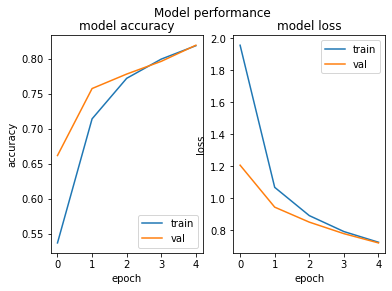

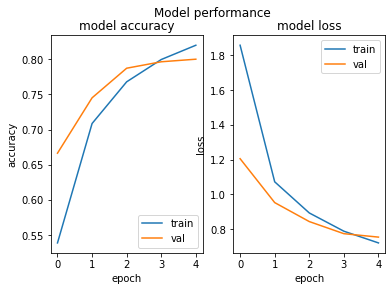

In [55]:
ens.plot()

In [57]:
ans = ens.predict(X_test)

2022-05-05 10:56:56.941497: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-05 10:56:57.472394: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [58]:
results = get_labels(ans)

In [307]:
a = y_test.tolist()

In [62]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_test, results)

array([[ 884,    0,    9,    6,    2,    6,   30,    2,    9,   15],
       [   1, 1095,   16,    5,    6,    5,    0,    4,    7,    1],
       [  71,    7,  633,   40,   64,   27,   25,   89,   31,    8],
       [  20,    9,   51,  664,    7,   62,   86,   13,   83,   13],
       [   9,    8,   92,    0,  604,   51,   31,  111,   15,   62],
       [  22,   11,    9,   44,   34,  671,   50,   19,   23,   12],
       [  26,   16,   15,   24,   10,   32,  636,   89,   20,  132],
       [  12,   16,   58,    5,   84,    6,  136,  663,    3,   35],
       [  14,   22,   87,  121,   21,   70,   46,    5,  589,   10],
       [  37,    5,   15,   12,   96,   38,  167,   37,   10,  596]])

In [70]:
from sklearn.metrics import precision_score, recall_score
a = precision_score(y_test, results,average='macro')
b =recall_score(y_test, results,average='macro')
print(a,b)

0.7024296164310289 0.7011166306161614


In [72]:
from sklearn.metrics import f1_score
f1_score(y_test, results,average='macro') 

0.6994493635317407

In [73]:
from sklearn.metrics import classification_report

# label_names = ['label A', 'label B', 'label C', 'label D']

print(classification_report(y_test, results))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       963
           1       0.92      0.96      0.94      1140
           2       0.64      0.64      0.64       995
           3       0.72      0.66      0.69      1008
           4       0.65      0.61      0.63       983
           5       0.69      0.75      0.72       895
           6       0.53      0.64      0.58      1000
           7       0.64      0.65      0.65      1018
           8       0.75      0.60      0.66       985
           9       0.67      0.59      0.63      1013

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000

